In [1]:
#importing necessary librariesimport numpy as np # linear algebra
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
## Reading a CSV file into a DataFrame for heart disease prediction
df=pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
# Displaying the first few rows of the DataFrame (df)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
# Displaying the last few rows of the DataFrame (df)
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
## Showing the dimensions (rows, columns) of the DataFrame (df)
df.shape

(270, 14)

In [6]:
# Generating descriptive statistics for the DataFrame (df)
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
# Extracting numerical variables from the DataFrame (df) and storing them in num_var
num_var=df.iloc[:,0:13]

In [8]:
num_var

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [9]:
# Generating descriptive statistics for categorical variables in the DataFrame (df)
df.describe(include='object')

,Heart Disease
count,270
unique,2
top,Absence
freq,150


In [10]:
# Extracting the last column as a categorical variable from the DataFrame (df) and storing it in cat_var
cat_var=df.iloc[:,-1]

In [11]:
cat_var

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

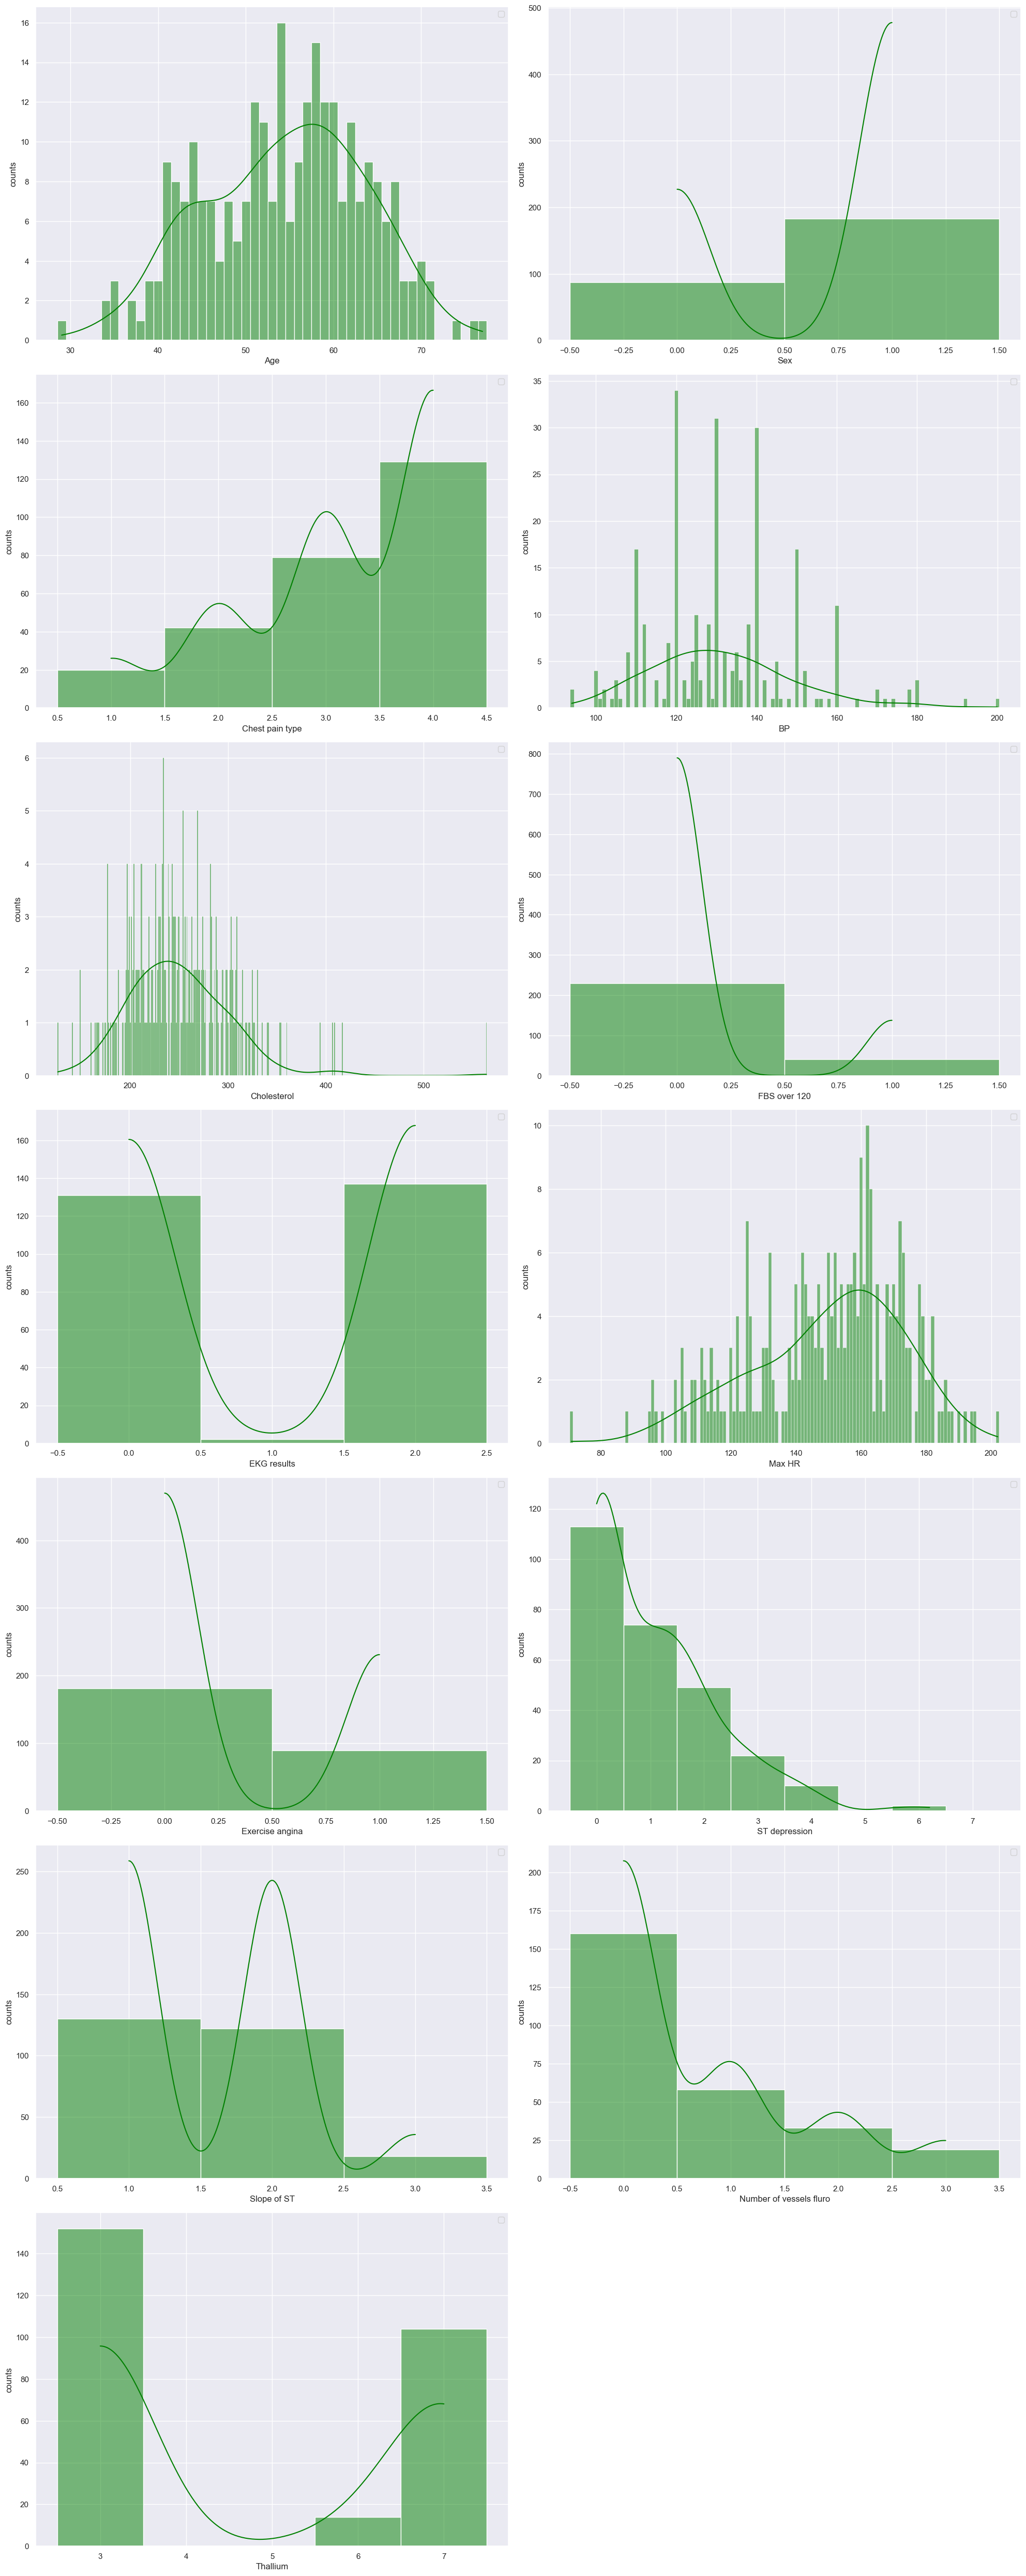

In [12]:
# Visualizing histograms for numerical variables in num_var using Seaborn
sns.set_theme(style="darkgrid",color_codes=True)
plt.figure(figsize=(20,50))
plotnumber=1
for col in num_var:
    if plotnumber<=13:
        ax=plt.subplot(7,2,plotnumber)
        sns.histplot(x=num_var[col],bins = 10,discrete = True,kde = True,color='green')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.legend()
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Heart Disease', ylabel='count'>

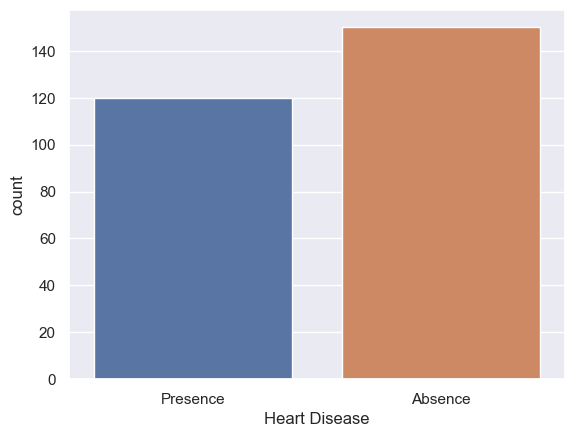

In [13]:
# Creating a count plot for the 'Heart Disease' variable using Seaborn
sns.countplot(x='Heart Disease' ,data=df)

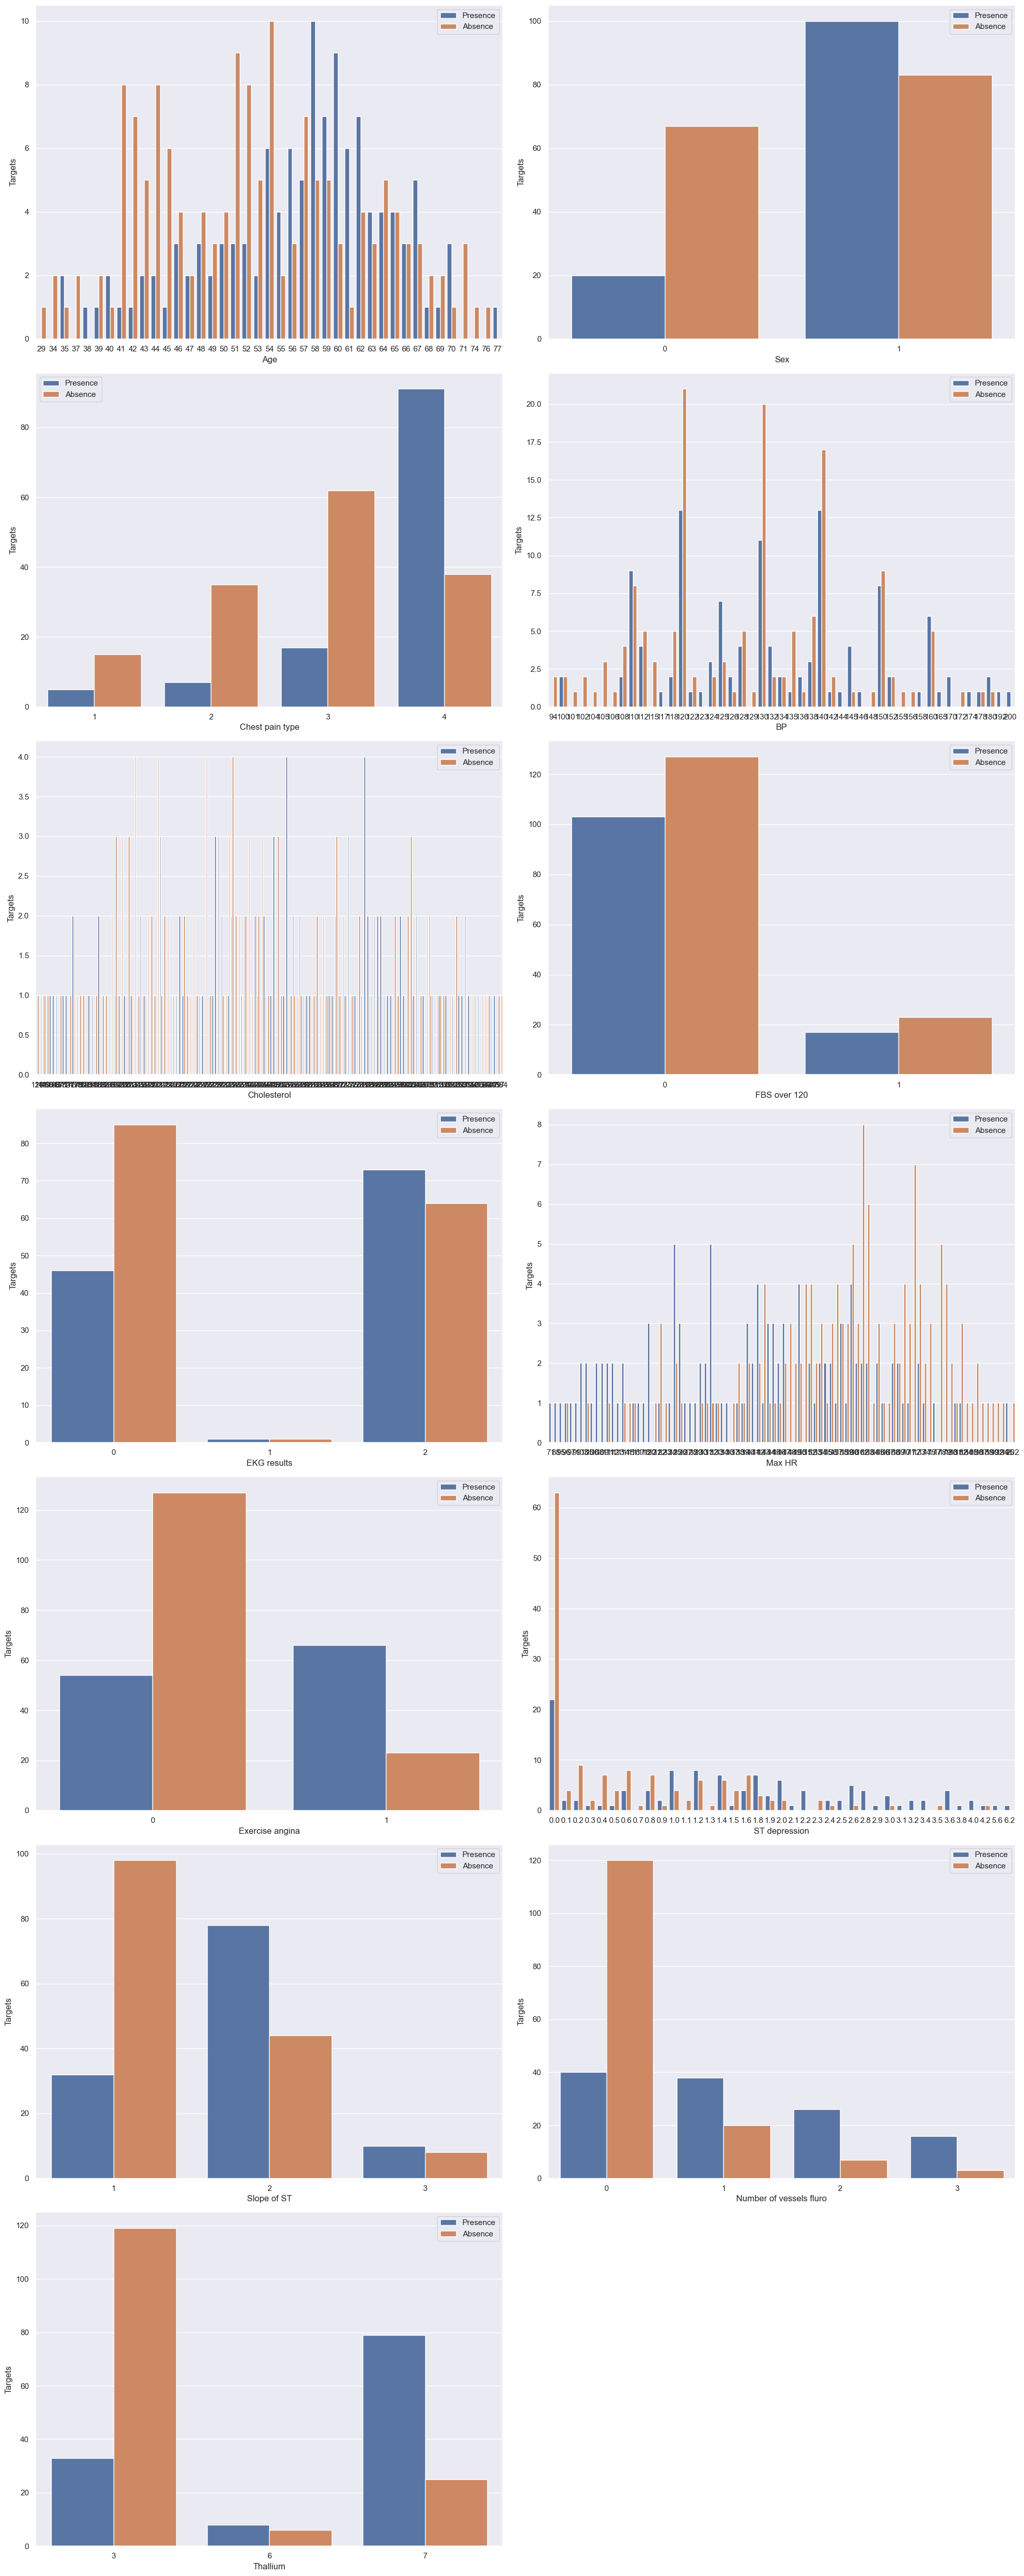

In [14]:
# Creating count plots for each feature in the DataFrame (df) with respect to 'Heart Disease' using Seaborn
plt.figure(figsize=(20,50))
plotnumber=1
for col in df:
    if plotnumber<=13:
        ax=plt.subplot(7,2,plotnumber)
        sns.countplot(x=df[col],hue=df['Heart Disease'])
        plt.xlabel(col)
        plt.ylabel('Targets')
        plt.legend()
    plotnumber+=1
plt.tight_layout() 


<Figure size 2000x5000 with 0 Axes>

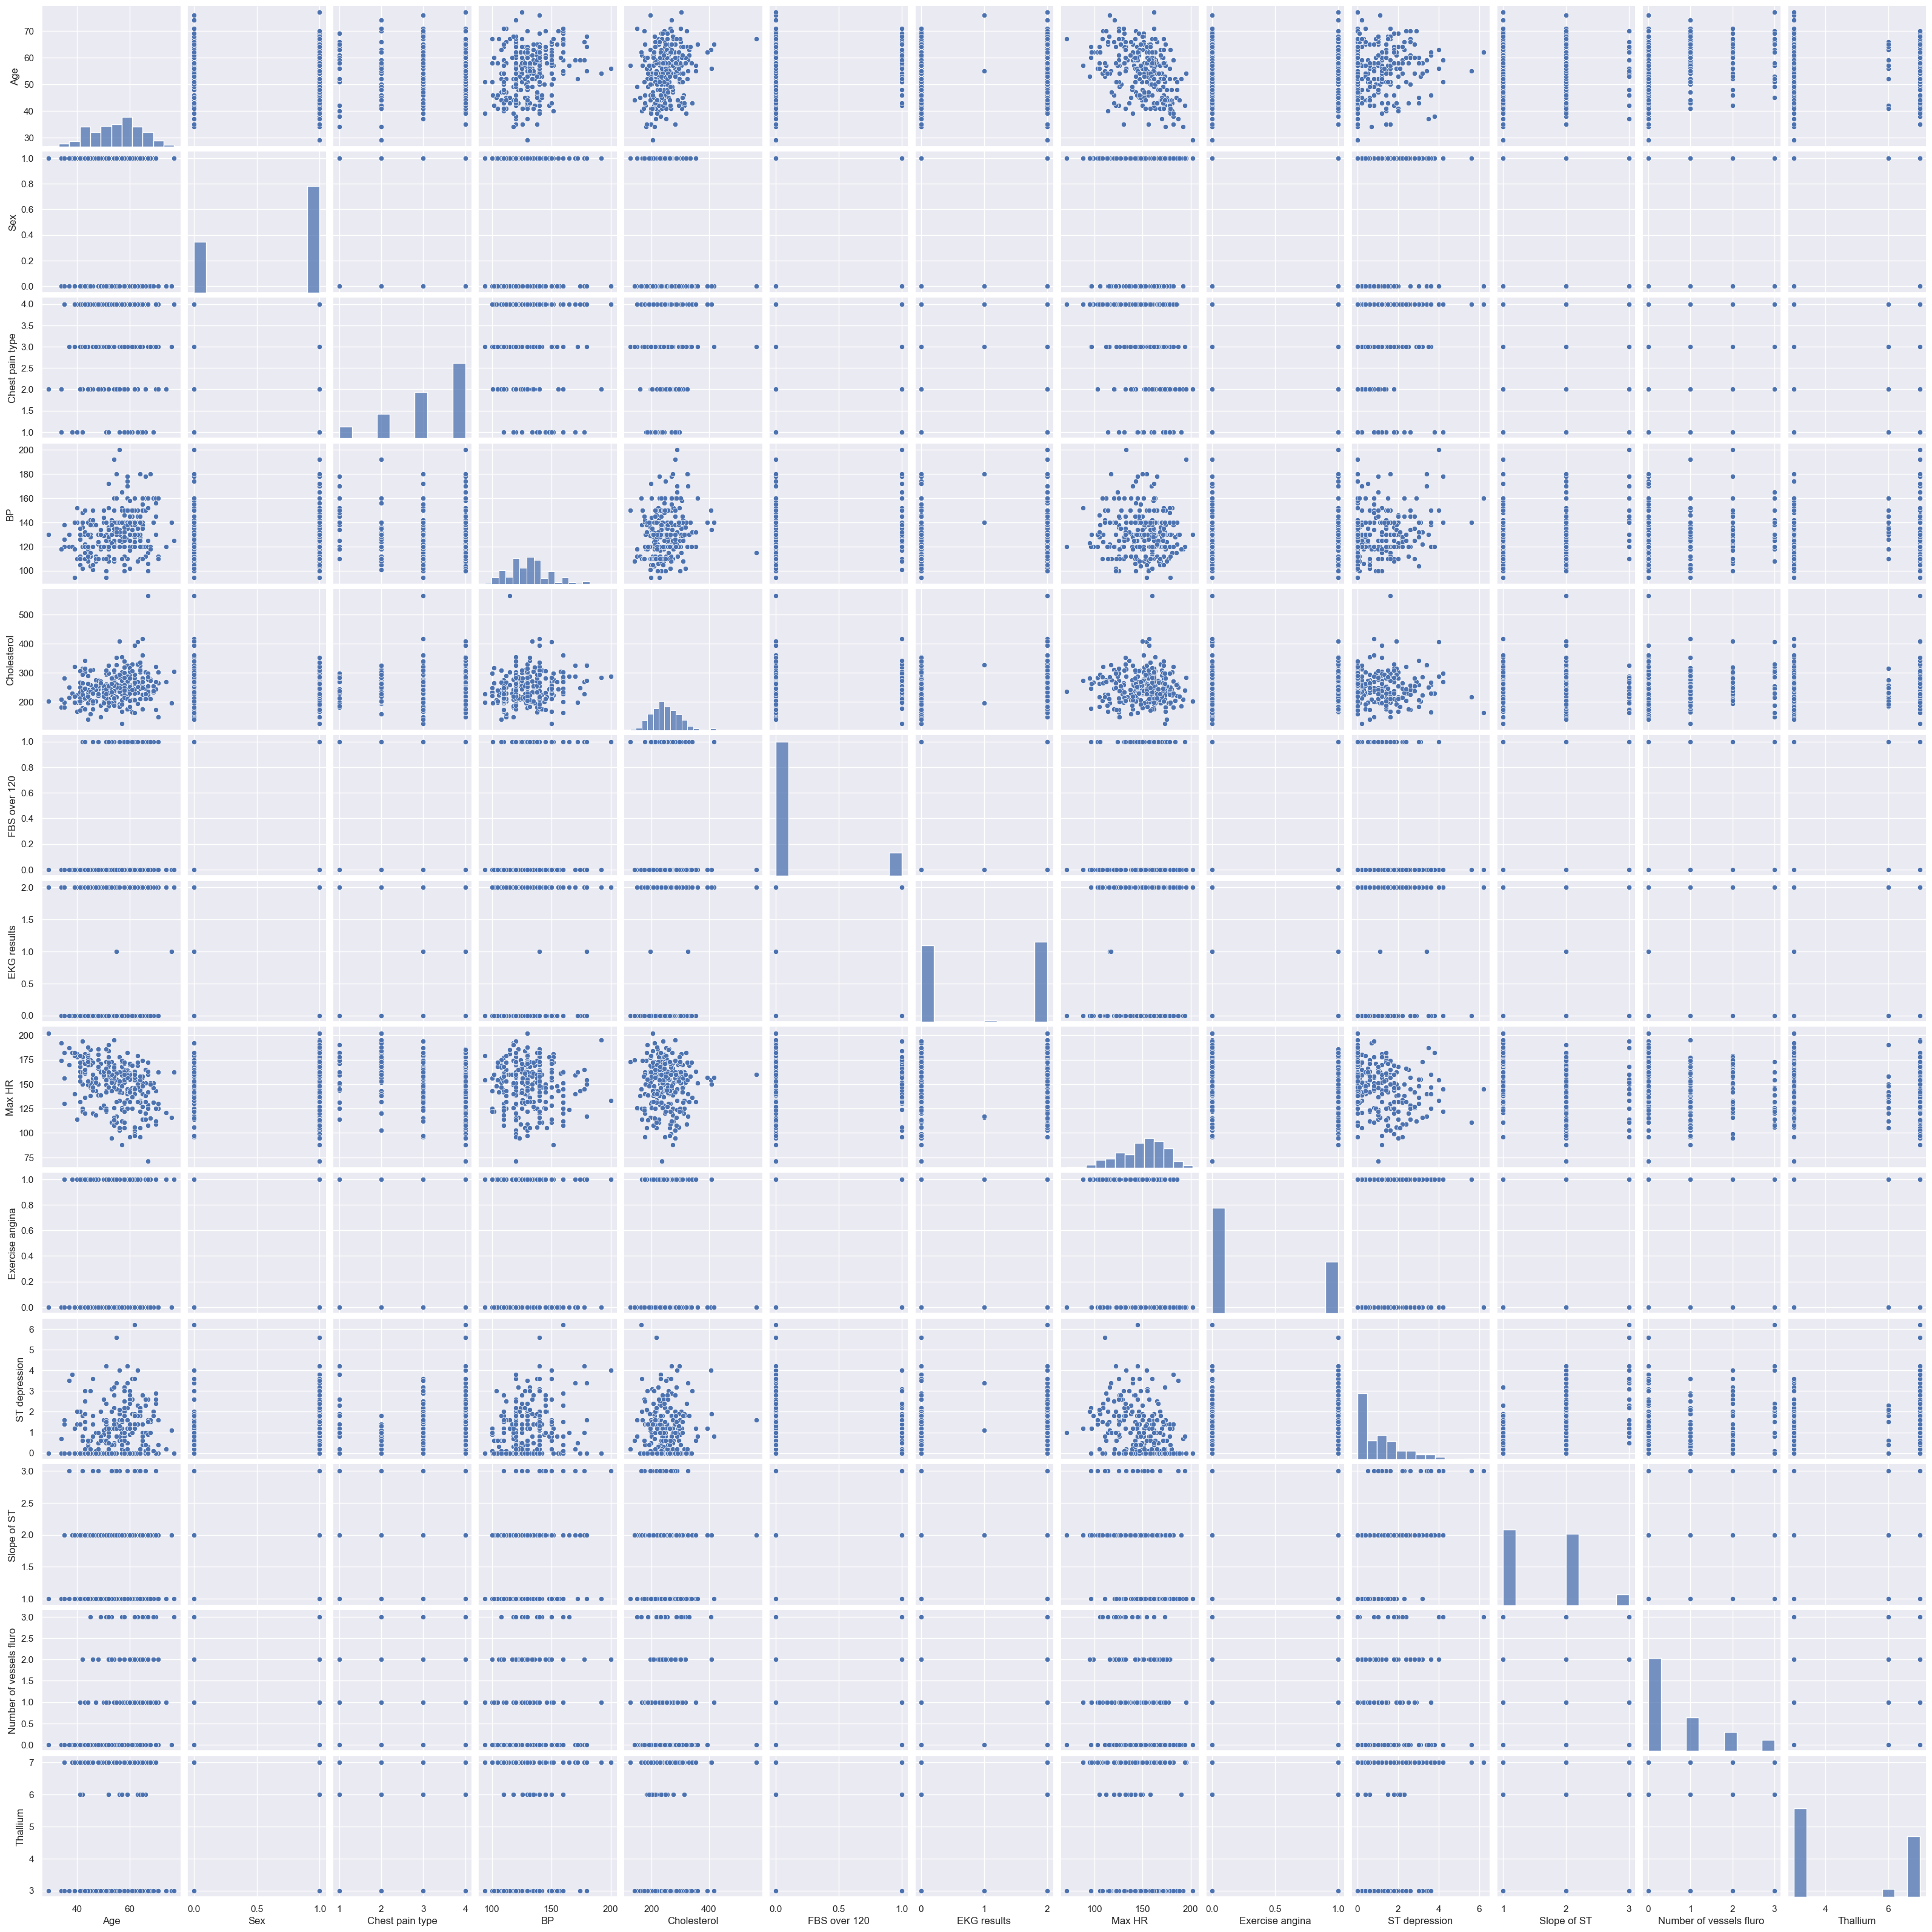

In [15]:
# Creating a pair plot for the DataFrame (df) using Seaborn
plt.figure(figsize=(20,50))
sns.pairplot(df)
plt.show()

In [16]:
# Counting the number of missing values in each column of the DataFrame (df)
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

The output from df.isnull().sum() indicates that there are no missing values in any of the columns of the DataFrame. All columns, including 'Age,' 'Sex,' 'BP,' 'Cholesterol,' and others, have complete data with no gaps. This dataset is therefore ready for analysis and modeling without the need for imputation or handling missing values.

In [17]:
# Counting the number of duplicated rows in the DataFrame (df)
df.duplicated().sum()

0

The output df.duplicated().sum() indicates that there are no duplicate rows in the DataFrame. The dataset contains unique entries, ensuring that each row represents distinct information. This absence of duplicates is essential for accurate and reliable analyses, as each data point is unique and contributes independently to the overall dataset.

In [18]:
x=df.iloc[:,0:13]
Y=df['Heart Disease']

The code separates the features (X) and the target variable 'Heart Disease' (Y) from the DataFrame. X includes the first 13 columns representing various attributes, while Y represents the presence or absence of heart disease. This division prepares the data for machine learning analysis, with X as input features and Y as the target variable for predictions.

In [20]:
# Using LabelEncoder to convert categorical labels in Y to numerical format and storing them in y
Label_Encoder=LabelEncoder()
y=Label_Encoder.fit_transform(Y)
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [21]:
# Creating a DataFrame 'train_tar' from the numerical labels 'y'
train_tar=pd.DataFrame(y)
train_tar

,0
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


In [22]:
# Using StandardScaler to standardize features in x and storing them in X
stand_scaler=StandardScaler()
X=stand_scaler.fit_transform(x)
X

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

In [23]:
# Creating a DataFrame 'train_fur' from the standardized features 'X'
train_fur=pd.DataFrame(X)
train_fur

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [24]:
# Calculating the correlation matrix for the DataFrame 'train_fur' and storing it in 'df_crr'
df_crr=train_fur.corr()
df_crr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
1,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
2,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
3,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
4,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
5,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
6,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
7,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
8,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
9,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


The correlation matrix shows how different variables are related. Key points:

Strong positive correlation between variables 0 and 3 (0.273) and 0 and 11 (0.356).
Strong negative correlation between variables 7 and 11 (-0.265).
Variable 7 has a significant negative impact on several others.
Variables 9 and 10 show a strong positive correlation (0.609).

Text(0.5, 1.0, 'Heat Map')

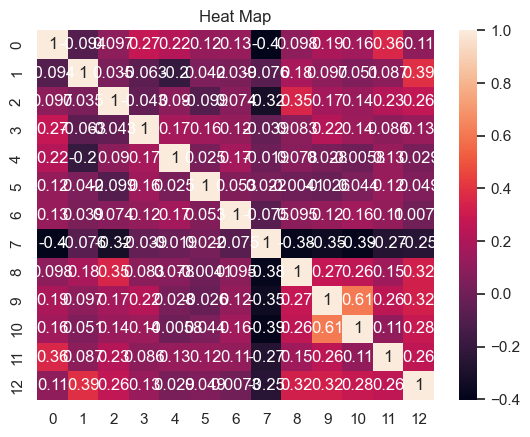

In [28]:
# Creating a heatmap of the correlation matrix 'df_crr' with annotations and custom figure size
plt.figsize=(50,20)
sns.heatmap(df_crr,annot=True)
plt.title("Heat Map")

In [26]:
# Splitting the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test=train_test_split(train_fur, train_tar, test_size=0.33, random_state=42)

The code is splitting the dataset into training and testing sets:

Training Sets: X_train and y_train for features and labels.

Testing Sets: X_test and y_test for evaluation.

Splitting Configuration:

33% of the data used for testing, 67% for training.
random_state=42 ensures consistent results for reproducibility.
The purpose is to train a machine learning model on the training data and assess its performance on unseen test data.

In [29]:
# Creating a Logistic Regression model, training it on the training sets, making predictions on the test set, and calculating accuracy
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred=lr_model.predict(X_test)
lr_accur=accuracy_score(y_test,lr_pred)
lr_accur

0.7888888888888889

The logistic regression model was trained on the training data (X_train, y_train) and tested on unseen data (X_test). The result:

Accuracy: The model achieved an accuracy of approximately 78.89% on the test set (y_test).

Conclusion:

The model performs reasonably well, correctly predicting the target variable in about 79% of cases. Further analysis or tuning may be needed based on specific project requirements, but this accuracy provides a basic measure of the model's effectiveness.